#**Proje Bilgilendirme**
Bu proje, kalp hastalığı tahmini üzerine odaklanmaktadır ve çeşitli makine öğrenme teknikleri kullanarak hastalık riskini öngörmeye çalışmaktadır. Proje kapsamında, Kaggle'dan alınan ["Indicators of Heart Disease"](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) veri seti kullanılmaktadır. Bu veri seti, hastaların sağlık bilgilerini içeren özellikler sunarak, kalp hastalığına dair önemli bilgiler sağlamaktadır.

Bu projede, makine öğrenme algoritmalarını kullanarak kalp hastalığı riskini tahmin eden bir model geliştirilmiştir ve çeşitli analizlerle sonuçlar değerlendirilmiştir.


---



#Gerekli kütüphanelerin yüklenmesi
Bu kod hücresinde, veri işleme ve görselleştirme için gerekli kütüphaneler yüklenir ve uyarılar gizlenir.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Veriyi yükleme ve ilk inceleme
Bu kod hücresinde, bir CSV dosyasından veri okunur ve ilk 5 satır df DataFrame'inde görüntülenir.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/aygazMakineOgrenmesi/indicatorsOfHeartDisease.csv")  # veriyi df DataFrame'ine kaydeder
df.head() # ilk 5 veriyi gösterir
df= df.sample(frac=0.1, random_state=42)


#Veri Tipi ve Eksik Veri Kontrolü
Bu kod hücresinde, veri çerçevesinin genel bilgileri (df.info()) ve istatistiksel özeti (df.describe()) görüntülenir.

In [ ]:
df.info()  # Verinin genel bilgileri
df.describe()  # İstatistiksel özet

<class 'pandas.core.frame.DataFrame'>
Index: 31980 entries, 271884 to 101687
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      31980 non-null  object 
 1   BMI               31980 non-null  float64
 2   Smoking           31980 non-null  object 
 3   AlcoholDrinking   31980 non-null  object 
 4   Stroke            31980 non-null  object 
 5   PhysicalHealth    31980 non-null  float64
 6   MentalHealth      31980 non-null  float64
 7   DiffWalking       31980 non-null  object 
 8   Sex               31980 non-null  object 
 9   AgeCategory       31980 non-null  object 
 10  Race              31980 non-null  object 
 11  Diabetic          31980 non-null  object 
 12  PhysicalActivity  31980 non-null  object 
 13  GenHealth         31980 non-null  object 
 14  SleepTime         31980 non-null  float64
 15  Asthma            31980 non-null  object 
 16  KidneyDisease     31980 non-null  objec

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,31980.000000,31980.000000,31980.000000,31980.000000
mean,28.355179,3.443965,3.884021,7.112539
std,6.373277,8.022188,7.937088,1.435066
min,12.400000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.340000,0.000000,0.000000,7.000000
75%,31.450000,2.000000,3.000000,8.000000
max,91.820000,30.000000,30.000000,24.000000



#Sütun İsimlerini Yeniden Adlandırma
Bu kod hücresinde, veri çerçevesindeki sütun isimleri daha anlamlı ve Python kodu için uygun hale getirilir.

In [ ]:
df = df.rename(columns={
    'HeartDisease': 'heart_disease',
    'BMI': 'bmi',
    'Smoking': 'smoking',
    'AlcoholDrinking': 'alcohol_drinking',
    'Stroke': 'stroke',
    'PhysicalHealth': 'physical_health',
    'MentalHealth': 'mental_health',
    'DiffWalking': 'diff_walking',
    'Sex': 'sex',
    'AgeCategory': 'age_category',
    'Race': 'race',
    'Diabetic': 'diabetic',
    'PhysicalActivity': 'physical_activity',
    'GenHealth': 'general_health',
    'SleepTime': 'sleep_time',
    'Asthma': 'asthma',
    'KidneyDisease': 'kidney_disease',
    'SkinCancer': 'skin_cancer'
})

#Kategorik Verileri Sayısal Verilere Dönüştürme
Bu kod hücresinde, Evet/Hayır olarak verilen veriler 1 ve 0 değerlerine dönüştürülür. Ayrıca, cinsiyet ve ırk gibi kategorik değerler de 1 ve 0 şeklinde kodlanır.

In [ ]:
# Evet/Hayır olarak verilen veriler 1 ve 0'a dönüştürülüyor
df['heart_disease'] = df['heart_disease'].apply(lambda x: 1 if x == 'Yes' else 0)
df['smoking'] = df['smoking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['alcohol_drinking'] = df['alcohol_drinking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['stroke'] = df['stroke'].apply(lambda x: 1 if x == 'Yes' else 0)
df['diff_walking'] = df['diff_walking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['diabetic'] = df['diabetic'].apply(lambda x: 1 if x == 'Yes' else 0)
df['physical_activity'] = df['physical_activity'].apply(lambda x: 1 if x == 'Yes' else 0)
df['asthma'] = df['asthma'].apply(lambda x: 1 if x == 'Yes' else 0)
df['kidney_disease'] = df['kidney_disease'].apply(lambda x: 1 if x == 'Yes' else 0)
df['skin_cancer'] = df['skin_cancer'].apply(lambda x: 1 if x == 'Yes' else 0)

# Cinsiyet ve ırk da 1 ve 0'a dönüştürülüyor
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'Female' else 0)
df['race'] = df['race'].apply(lambda x: 1 if x == 'White' else 0)

Bu kod hücresinde, genel sağlık ve yaş kategorilerindeki metin değerleri sayısal değerlere dönüştürülür. general_health ve age_category sütunları, belirli bir sayısal aralıkla temsil edilen değerlere dönüştürülür ve dönüştürülmüş ilk 5 satır tekrar incelenir.

In [ ]:
# Genel sağlık verisi kategorilere ayrılıyor
def general_health_to_numeric(general_health):
    if general_health == 'Excellent':
        return 4
    elif general_health == 'Very good':
        return 3
    elif general_health == 'Good':
        return 2
    elif general_health == 'Fair':
        return 1
    elif general_health == 'Poor':
        return 0
    else:
        return -1  # Hatalı veri durumunda

# Yaş kategorilerini de sayısal değerlere dönüştürme
def age_category_to_numeric(age_category):
    if age_category == '80 or older':
        return 12
    elif age_category == '75-79':
        return 11
    elif age_category == '70-74':
        return 10
    elif age_category == '65-69':
        return 9
    elif age_category == '60-64':
        return 8
    elif age_category == '55-59':
        return 7
    elif age_category == '50-54':
        return 6
    elif age_category == '45-49':
        return 5
    elif age_category == '40-44':
        return 4
    elif age_category == '35-39':
        return 3
    elif age_category == '30-34':
        return 2
    elif age_category == '25-29':
        return 1
    elif age_category == '20-24':
        return 0
    else:
        return -1  # Hatalı veri durumunda

df['general_health'] = df['general_health'].apply(general_health_to_numeric)
df['age_category'] = df['age_category'].apply(age_category_to_numeric)

df.head()  # İlk 5 veriyi tekrar inceleme

,heart_disease,bmi,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,general_health,sleep_time,asthma,kidney_disease,skin_cancer
271884,0,27.63,1,0,0,0.0,25.0,0,1,1,0,0,1,3,7.0,0,0,0
270361,0,21.95,0,0,0,0.0,20.0,0,1,2,1,0,1,4,6.0,0,0,1
219060,0,31.32,1,0,0,0.0,0.0,0,1,4,1,0,1,3,6.0,1,0,0
24010,0,40.35,0,0,0,30.0,0.0,0,1,9,1,0,0,2,8.0,0,0,0
181930,0,35.61,1,0,0,30.0,30.0,1,1,8,1,0,0,1,4.0,1,0,1



#Eğitim ve Test Kümelerine Ayırma
Bu kod hücresinde, özellikler (X) ve hedef değişken (y) oluşturulur ve veri seti eğitim (%70) ve test (%20) kümelerine ayrılır. Verinin karıştırılması (shuffle=True) ve rastgelelik (random_state=42) ayarlanır.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

# Eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Lineer Regresyon Modelinin Değerlendirilmesi

Bu kod hücresinde, Lineer Regresyon (Linear Regression) modeli oluşturulur ve eğitim verisi üzerinde eğitilir. Model, test verisi üzerinde tahminler yaparak çeşitli performans metriklerini (Ortalama Kare Hata - MSE, Ortalama Mutlak Hata - MAE ve R^2 Skoru) hesaplar. Ayrıca, çapraz doğrulama (cross-validation) kullanarak modelin genel performansını değerlendirmek için 5 katlı çapraz doğrulama uygulanır. Çapraz doğrulama sonuçları da ekrana yazdırılarak modelin doğruluğu hakkında daha fazla bilgi sağlanır.


In [ ]:
# Gerekli kütüphaneler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Lineer regresyon modelini oluştur
linear_model = LinearRegression()

# Modeli eğit
linear_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred = linear_model.predict(X_test)

# Performans metriklerini hesapla
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Metrikleri ekrana yazdır
print(f"Ortalama Kare Hata (MSE): {mse:.2f}")
print(f"Ortalama Mutlak Hata (MAE): {mae:.2f}")
print(f"R^2 Skoru: {r2:.2f}")

# Çapraz doğrulama ile modelin performansını değerlendir
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2')

# Çapraz doğrulama sonuçlarını ekrana yazdır
print("Çapraz Doğrulama R^2 Skorları:", cv_scores)
print(f"Ortalama Çapraz Doğrulama R^2 Skoru: {np.mean(cv_scores)}")
print(f"Standart Sapma: {np.std(cv_scores)}")

Ortalama Kare Hata (MSE): 0.07
Ortalama Mutlak Hata (MAE): 0.15
R^2 Skoru: 0.15
Çapraz Doğrulama R^2 Skorları: [0.12767658 0.13423158 0.134796   0.13601643 0.13959803]
Ortalama Çapraz Doğrulama R^2 Skoru: 0.13446372295161566
Standart Sapma: 0.0038730235337031465


# Logistic Regression (Lojistik Regresyon) Modeli Değerlendirmesi

Bu kod hücresinde, Logistic Regression (Lojistik Regresyon) modeli oluşturulur ve test verileri üzerinde eğitilerek tahminler yapılır. Modelin performansı, accuracy (doğruluk), precision (hassasiyet), recall (geri çağırma), F1 skoru ve ROC AUC skoru gibi metriklerle değerlendirilir. Ayrıca, 5-katlı çapraz doğrulama ile modelin genel performansı analiz edilerek ortalama ve standart sapma hesaplanır.


In [ ]:
# Gerekli kütüphaneler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Modeli oluştur
log_model = LogisticRegression()

# Modeli eğit
log_model.fit(X_train, y_train)

# Tahmin yap
y_pred_log = log_model.predict(X_test)

# Metrik hesaplamaları
log_accuracy = accuracy_score(y_test, y_pred_log)
log_precision = precision_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)
log_roc_auc = roc_auc_score(y_test, y_pred_log)

# Sonuçları yazdır
print("Model: Logistic Regression")
print(f"Doğruluk (Accuracy): {log_accuracy:.2f}")
print(f"Hassasiyet (Precision): {log_precision:.2f}")
print(f"Geri Çağırma (Recall): {log_recall:.2f}")
print(f"F1 Skoru: {log_f1:.2f}")
print(f"ROC AUC Skoru: {log_roc_auc:.2f}")

# Çapraz doğrulama ile modeli değerlendir
cv_scores_log = cross_val_score(log_model, X_train, y_train, cv=5, scoring='accuracy')

# Çapraz doğrulama sonuçlarını yazdır
print("Çapraz Doğrulama Skorları:", cv_scores_log)
print(f"Ortalama Çapraz Doğrulama Skoru: {np.mean(cv_scores_log)}")
print(f"Standart Sapma: {np.std(cv_scores_log)}")


Model: Logistic Regression
Doğruluk (Accuracy): 0.91
Hassasiyet (Precision): 0.54
Geri Çağırma (Recall): 0.10
F1 Skoru: 0.16
ROC AUC Skoru: 0.54
Çapraz Doğrulama Skorları: [0.91205785 0.91127614 0.91186242 0.91186242 0.91731822]
Ortalama Çapraz Doğrulama Skoru: 0.9128754081773444
Standart Sapma: 0.0022368244097887707


# Decision Tree (Karar Ağaçları) Modeli Değerlendirmesi

Bu kod hücresinde, Decision Tree (Karar Ağaçları) modeli oluşturulur ve test verileri üzerinde eğitilerek tahminler yapılır. Modelin performansı, accuracy (doğruluk), precision (hassasiyet), recall (geri çağırma), F1 skoru ve ROC AUC skoru gibi metriklerle değerlendirilir. Ayrıca, 5-katlı çapraz doğrulama ile modelin genel performansı analiz edilerek ortalama ve standart sapma hesaplanır.


In [ ]:
# Gerekli kütüphaneler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Karar ağacı modelini oluştur
tree_model = DecisionTreeClassifier()

# Modeli eğit
tree_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred_tree = tree_model.predict(X_test)

# Performans metriklerini hesapla
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_precision = precision_score(y_test, y_pred_tree)
tree_recall = recall_score(y_test, y_pred_tree)
tree_f1 = f1_score(y_test, y_pred_tree)
tree_roc_auc = roc_auc_score(y_test, y_pred_tree)

# Metrikleri ekrana yazdır
print("Model: Decision Tree")
print(f"Doğruluk (Accuracy): {tree_accuracy:.2f}")
print(f"Hassasiyet (Precision): {tree_precision}")
print(f"Geri Çağırma (Recall): {tree_recall}")
print(f"F1 Skoru: {tree_f1}")
print(f"ROC AUC Skoru: {tree_roc_auc}")

# Çapraz doğrulama ile modelin performansını değerlendir
cv_scores_tree = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='accuracy')

# Çapraz doğrulama sonuçlarını ekrana yazdır
print("Çapraz Doğrulama Doğruluk Skorları:", cv_scores_tree)
print(f"Ortalama Çapraz Doğrulama Doğruluk Skoru: {np.mean(cv_scores_tree)}")
print(f"Standart Sapma: {np.std(cv_scores_tree)}")


Model: Decision Tree
Doğruluk (Accuracy): 0.86
Hassasiyet (Precision): 0.26614173228346455
Geri Çağırma (Recall): 0.2864406779661017
F1 Skoru: 0.27591836734693875
ROC AUC Skoru: 0.6030894399131232
Çapraz Doğrulama Doğruluk Skorları: [0.84600352 0.85010748 0.85088919 0.85518859 0.85301016]
Ortalama Çapraz Doğrulama Doğruluk Skoru: 0.8510397893361029
Standart Sapma: 0.0030773625952694355


# KNN (K-En Yakın Komşu) Modeli Değerlendirmesi

Bu kod hücresinde, KNN (K-En Yakın Komşu) modeli oluşturulur ve test verileri üzerinde eğitilerek tahminler yapılır. Modelin performansı, accuracy (doğruluk), precision (hassasiyet), recall (geri çağırma), F1 skoru ve ROC AUC skoru gibi metriklerle değerlendirilir. Ayrıca, 5-katlı çapraz doğrulama ile modelin genel performansı analiz edilerek ortalama ve standart sapma hesaplanır.


In [ ]:
# Gerekli kütüphaneler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# KNN modelini oluştur
knn_model = KNeighborsClassifier()

# Modeli eğit
knn_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred_knn = knn_model.predict(X_test)

# Performans metriklerini hesapla
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)

# Metrikleri ekrana yazdır
print("Model: KNN")
print(f"Doğruluk (Accuracy): {knn_accuracy:.2f}")
print(f"Hassasiyet (Precision): {knn_precision}")
print(f"Geri Çağırma (Recall): {knn_recall}")
print(f"F1 Skoru: {knn_f1}")
print(f"ROC AUC Skoru: {knn_roc_auc}")

# Çapraz doğrulama ile modelin performansını değerlendir
cv_scores_knn = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')

# Çapraz doğrulama sonuçlarını ekrana yazdır
print("Çapraz Doğrulama Doğrululuk Skorları:", cv_scores_knn)
print(f"Ortalama Çapraz Doğrulama Doğruluk Skoru: {np.mean(cv_scores_knn)}")
print(f"Standart Sapma: {np.std(cv_scores_knn)}")


Model: KNN
Doğruluk (Accuracy): 0.90
Hassasiyet (Precision): 0.2773109243697479
Geri Çağırma (Recall): 0.05593220338983051
F1 Skoru: 0.0930888575458392
ROC AUC Skoru: 0.5205599701069028
Çapraz Doğrulama Doğrululuk Skorları: [0.90052765 0.90189564 0.90287278 0.90189564 0.90285379]
Ortalama Çapraz Doğrulama Doğruluk Skoru: 0.902009101183976
Standart Sapma: 0.0008578896782001192


# Random Forest (Rastgele Orman) Modeli Değerlendirmesi

Bu kod hücresinde, Random Forest (Rastgele Orman) modeli oluşturulur ve test verileri üzerinde eğitilerek tahminler yapılır. Modelin performansı, accuracy (doğruluk), precision (hassasiyet), recall (geri çağırma), F1 skoru ve ROC AUC skoru gibi metriklerle değerlendirilir. Ayrıca, 5-katlı çapraz doğrulama ile modelin genel performansı analiz edilerek ortalama ve standart sapma hesaplanır.


In [ ]:
# Gerekli kütüphaneler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Random Forest modelini oluştur
rf_model = RandomForestClassifier()

# Modeli eğit
rf_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred_rf = rf_model.predict(X_test)

# Performans metriklerini hesapla
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)

# Metrikleri ekrana yazdır
print("Model: Random Forest")
print(f"Doğruluk (Accuracy): {rf_accuracy:.2f}")
print(f"Hassasiyet (Precision): {rf_precision}")
print(f"Geri Çağırma (Recall): {rf_recall}")
print(f"F1 Skoru: {rf_f1}")
print(f"ROC AUC Skoru: {rf_roc_auc}")

# Çapraz doğrulama ile modelin performansını değerlendir
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Çapraz doğrulama sonuçlarını ekrana yazdır
print("Çapraz Doğrulama Doğruluk Skorları:", cv_scores_rf)
print(f"Ortalama Çapraz Doğrulama Doğruluk Skoru: {np.mean(cv_scores_rf)}")
print(f"Standart Sapma: {np.std(cv_scores_rf)}")

Model: Random Forest
Doğruluk (Accuracy): 0.91
Hassasiyet (Precision): 0.460431654676259
Geri Çağırma (Recall): 0.10847457627118644
F1 Skoru: 0.1755829903978052
ROC AUC Skoru: 0.5477784524483731
Çapraz Doğrulama Doğruluk Skorları: [0.90658589 0.90580418 0.90619504 0.90932187 0.90734949]
Ortalama Çapraz Doğrulama Doğruluk Skoru: 0.9070512937069294
Standart Sapma: 0.001244949453867271


# SVM (Destek Vektör Makineleri) Modeli Değerlendirmesi

Bu kod hücresinde, SVM (Destek Vektör Makineleri) modeli oluşturulur ve test verileri üzerinde eğitilerek tahminler yapılır. Modelin performansı, accuracy (doğruluk), precision (hassasiyet), recall (geri çağırma), F1 skoru ve ROC AUC skoru gibi metriklerle değerlendirilir. Ayrıca, 5-katlı çapraz doğrulama ile modelin genel performansı analiz edilerek ortalama ve standart sapma hesaplanır.


In [ ]:
# Gerekli kütüphaneler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# SVM modelini oluştur
svm_model = SVC()

# Modeli eğit
svm_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred_svm = svm_model.predict(X_test)

# Performans metriklerini hesapla
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_roc_auc = roc_auc_score(y_test, y_pred_svm)

# Metrikleri ekrana yazdır
print("Model: SVM")
print(f"Doğruluk (Accuracy): {svm_accuracy:.2f}")
print(f"Hassasiyet (Precision): {svm_precision}")
print(f"Geri Çağırma (Recall): {svm_recall}")
print(f"F1 Skoru: {svm_f1}")
print(f"ROC AUC Skoru: {svm_roc_auc}")

# Çapraz doğrulama ile modelin performansını değerlendir
cv_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

# Çapraz doğrulama sonuçlarını ekrana yazdır
print("Çapraz Doğrulama Doğruluk Skorları:", cv_scores_svm)
print(f"Ortalama Çapraz Doğrulama Doğruluk Skoru: {np.mean(cv_scores_svm)}")
print(f"Standart Sapma: {np.std(cv_scores_svm)}")

Model: SVM
Doğruluk (Accuracy): 0.91
Hassasiyet (Precision): 0.0
Geri Çağırma (Recall): 0.0
F1 Skoru: 0.0
ROC AUC Skoru: 0.5
Çapraz Doğrulama Doğruluk Skorları: [0.91088528 0.91088528 0.91088528 0.91108071 0.91106333]
Ortalama Çapraz Doğrulama Doğruluk Skoru: 0.910959979024066
Standart Sapma: 9.164688183835055e-05


# Gaussian Naive Bayes (Gauss Naif Bayes) Modeli Değerlendirmesi

Bu kod hücresinde, Gaussian Naive Bayes (Gauss Naif Bayes) modeli oluşturulur ve test verileri üzerinde eğitilerek tahminler yapılır. Modelin performansı, accuracy (doğruluk), precision (hassasiyet), recall (geri çağırma), F1 skoru ve ROC AUC skoru gibi metriklerle değerlendirilir. Ayrıca, 5-katlı çapraz doğrulama ile modelin genel performansı analiz edilerek ortalama ve standart sapma hesaplanır.


In [ ]:
# Gerekli kütüphaneler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Naive Bayes modelini oluştur
nb_model = GaussianNB()

# Modeli eğit
nb_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred_nb = nb_model.predict(X_test)

# Performans metriklerini hesapla
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)

# Metrikleri ekrana yazdır
print("Model: Naive Bayes")
print(f"Doğruluk (Accuracy): {nb_accuracy:.2f}")
print(f"Hassasiyet (Precision): {nb_precision}")
print(f"Geri Çağırma (Recall): {nb_recall}")
print(f"F1 Skoru: {nb_f1}")
print(f"ROC AUC Skoru: {nb_roc_auc}")

# Çapraz doğrulama ile modelin performansını değerlendir
cv_scores_nb = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')

# Çapraz doğrulama sonuçlarını ekrana yazdır
print("Çapraz Doğrulama Doğruluk Skorları:", cv_scores_nb)
print(f"Ortalama Çapraz Doğrulama Doğruluk Skoru: {np.mean(cv_scores_nb)}")
print(f"Standart Sapma: {np.std(cv_scores_nb)}")

Model: Naive Bayes
Doğruluk (Accuracy): 0.84
Hassasiyet (Precision): 0.2734375
Geri Çağırma (Recall): 0.4745762711864407
F1 Skoru: 0.3469640644361834
ROC AUC Skoru: 0.6732164855759968
Çapraz Doğrulama Doğruluk Skorları: [0.82763338 0.8415087  0.83623217 0.83486418 0.83561376]
Ortalama Çapraz Doğrulama Doğruluk Skoru: 0.8351704363400723
Standart Sapma: 0.004436178071273726


# Linear Discriminant Analysis (Doğrusal Ayrım Analizi) Modeli Değerlendirmesi

Bu kod hücresinde, Linear Discriminant Analysis (Doğrusal Ayrım Analizi) modeli oluşturulur ve test verileri üzerinde eğitilerek tahminler yapılır. Modelin performansı, accuracy (doğruluk), precision (hassasiyet), recall (geri çağırma), F1 skoru ve ROC AUC skoru gibi metriklerle değerlendirilir. Ayrıca, 5-katlı çapraz doğrulama ile modelin genel performansı analiz edilerek ortalama ve standart sapma hesaplanır.


In [ ]:
# Gerekli kütüphaneler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# LDA modelini oluştur
lda_model = LinearDiscriminantAnalysis()

# Modeli eğit
lda_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred_lda = lda_model.predict(X_test)

# Performans metriklerini hesapla
lda_accuracy = accuracy_score(y_test, y_pred_lda)
lda_precision = precision_score(y_test, y_pred_lda)
lda_recall = recall_score(y_test, y_pred_lda)
lda_f1 = f1_score(y_test, y_pred_lda)
lda_roc_auc = roc_auc_score(y_test, y_pred_lda)

# Metrikleri ekrana yazdır
print("Model: LDA")
print(f"Doğruluk (Accuracy): {lda_accuracy:.2f}")
print(f"Hassasiyet (Precision): {lda_precision}")
print(f"Geri Çağırma (Recall): {lda_recall}")
print(f"F1 Skoru: {lda_f1}")
print(f"ROC AUC Skoru: {lda_roc_auc}")

# Çapraz doğrulama ile modelin performansını değerlendir
cv_scores_lda = cross_val_score(lda_model, X_train, y_train, cv=5, scoring='accuracy')

# Çapraz doğrulama sonuçlarını ekrana yazdır
print("Çapraz Doğrulama Doğruluk Skorları:", cv_scores_lda)
print(f"Ortalama Çapraz Doğrulama Doğruluk Skoru: {np.mean(cv_scores_lda)}")
print(f"Standart Sapma: {np.std(cv_scores_lda)}")

Model: LDA
Doğruluk (Accuracy): 0.90
Hassasiyet (Precision): 0.4429530201342282
Geri Çağırma (Recall): 0.22372881355932203
F1 Skoru: 0.2972972972972973
ROC AUC Skoru: 0.5975688504586139
Çapraz Doğrulama Doğruluk Skorları: [0.90619504 0.90541333 0.90365449 0.9022865  0.91184519]
Ortalama Çapraz Doğrulama Doğruluk Skoru: 0.9058789073750851
Standart Sapma: 0.003279229256576484


# Gradient Boosting (Eğim Artışı) Modeli Değerlendirmesi

Bu kod hücresinde, Gradient Boosting (Eğim Artışı) modeli oluşturulur ve test verileri üzerinde eğitilerek tahminler yapılır. Modelin performansı, accuracy (doğruluk), precision (hassasiyet), recall (geri çağırma), F1 skoru ve ROC AUC skoru gibi metriklerle değerlendirilir. Ayrıca, 5-katlı çapraz doğrulama ile modelin genel performansı analiz edilerek ortalama ve standart sapma hesaplanır.


In [ ]:
# Gerekli kütüphaneler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Gradient Boosting modelini oluştur
gb_model = GradientBoostingClassifier()

# Modeli eğit
gb_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred_gb = gb_model.predict(X_test)

# Performans metriklerini hesapla
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)
gb_roc_auc = roc_auc_score(y_test, y_pred_gb)

# Metrikleri ekrana yazdır
print("Model: Gradient Boosting")
print(f"Doğruluk (Accuracy): {gb_accuracy:.2f}")
print(f"Hassasiyet (Precision): {gb_precision}")
print(f"Geri Çağırma (Recall): {gb_recall}")
print(f"F1 Skoru: {gb_f1}")
print(f"ROC AUC Skoru: {gb_roc_auc}")

# Çapraz doğrulama ile modelin performansını değerlendir
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')

# Çapraz doğrulama sonuçlarını ekrana yazdır
print("Çapraz Doğrulama Doğrulukt Skorları:", cv_scores_gb)
print(f"Ortalama Çapraz Doğrulama Doğruluk Skoru: {np.mean(cv_scores_gb)}")
print(f"Standart Sapma: {np.std(cv_scores_gb)}")

Model: Gradient Boosting
Doğruluk (Accuracy): 0.91
Hassasiyet (Precision): 0.56
Geri Çağırma (Recall): 0.09491525423728814
F1 Skoru: 0.16231884057971013
ROC AUC Skoru: 0.5436684435154749
Çapraz Doğrulama Doğrulukt Skorları: [0.91323041 0.91323041 0.91166699 0.91147157 0.91712275]
Ortalama Çapraz Doğrulama Doğruluk Skoru: 0.9133444253567383
Standart Sapma: 0.002030917969624783


# AdaBoost (Ada Artışı) Modeli Değerlendirmesi

Bu kod hücresinde, AdaBoost (Ada Artışı) modeli oluşturulur ve test verileri üzerinde eğitilerek tahminler yapılır. Modelin performansı, accuracy (doğruluk), precision (hassasiyet), recall (geri çağırma), F1 skoru ve ROC AUC skoru gibi metriklerle değerlendirilir. Ayrıca, 5-katlı çapraz doğrulama ile modelin genel performansı analiz edilerek ortalama ve standart sapma hesaplanır.


In [ ]:
# Gerekli kütüphaneler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# AdaBoost modelini oluştur
ada_model = AdaBoostClassifier()

# Modeli eğit
ada_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred_ada = ada_model.predict(X_test)

# Performans metriklerini hesapla
ada_accuracy = accuracy_score(y_test, y_pred_ada)
ada_precision = precision_score(y_test, y_pred_ada)
ada_recall = recall_score(y_test, y_pred_ada)
ada_f1 = f1_score(y_test, y_pred_ada)
ada_roc_auc = roc_auc_score(y_test, y_pred_ada)

# Metrikleri ekrana yazdır
print("Model: AdaBoost")
print(f"Doğruluk (Accuracy): {ada_accuracy:.2f}")
print(f"Hassasiyet (Precision): {ada_precision}")
print(f"Geri Çağırma (Recall): {ada_recall}")
print(f"F1 Skoru: {ada_f1}")
print(f"ROC AUC Skoru: {ada_roc_auc}")

# Çapraz doğrulama ile modelin performansını değerlendir
cv_scores_ada = cross_val_score(ada_model, X_train, y_train, cv=5, scoring='accuracy')

# Çapraz doğrulama sonuçlarını ekrana yazdır
print("Çapraz Doğrulama Doğruluk Skorları:", cv_scores_ada)
print(f"Ortalama Çapraz Doğrulama Doğruluk Skoru: {np.mean(cv_scores_ada)}")
print(f"Standart Sapma: {np.std(cv_scores_ada)}")

Model: AdaBoost
Doğruluk (Accuracy): 0.91
Hassasiyet (Precision): 0.5338983050847458
Geri Çağırma (Recall): 0.10677966101694915
F1 Skoru: 0.17796610169491525
ROC AUC Skoru: 0.5486533510045132
Çapraz Doğrulama Doğruluk Skorları: [0.91127614 0.90912644 0.91127614 0.91088528 0.91594996]
Ortalama Çapraz Doğrulama Doğruluk Skoru: 0.9117027926504166
Standart Sapma: 0.002267527825787265


# MLP (Çok Katmanlı Perceptron) Modeli Değerlendirmesi

Bu kod hücresinde, MLP (Çok Katmanlı Perceptron) modeli oluşturulur ve test verileri üzerinde eğitilerek tahminler yapılır. Modelin performansı, accuracy (doğruluk), precision (hassasiyet), recall (geri çağırma), F1 skoru ve ROC AUC skoru gibi metriklerle değerlendirilir. Ayrıca, 5-katlı çapraz doğrulama ile modelin genel performansı analiz edilerek ortalama ve standart sapma hesaplanır.


In [ ]:
# Gerekli kütüphaneler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# MLP modelini oluştur
mlp_model = MLPClassifier(max_iter=1000)

# Modeli eğit
mlp_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred_mlp = mlp_model.predict(X_test)

# Performans metriklerini hesapla
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_precision = precision_score(y_test, y_pred_mlp)
mlp_recall = recall_score(y_test, y_pred_mlp)
mlp_f1 = f1_score(y_test, y_pred_mlp)
mlp_roc_auc = roc_auc_score(y_test, y_pred_mlp)

# Metrikleri ekrana yazdır
print("Model: MLP")
print(f"Doğruluk (Accuracy): {mlp_accuracy:.2f}")
print(f"Hassasiyet (Precision): {mlp_precision}")
print(f"Geri Çağırma (Recall): {mlp_recall}")
print(f"F1 Skoru: {mlp_f1}")
print(f"ROC AUC Skoru: {mlp_roc_auc}")

# Çapraz doğrulama ile modelin performansını değerlendir
cv_scores_mlp = cross_val_score(mlp_model, X_train, y_train, cv=5, scoring='accuracy')

# Çapraz doğrulama sonuçlarını ekrana yazdır
print("Çapraz Doğrulama Doğruluk Skorları:", cv_scores_mlp)
print(f"Ortalama Çapraz Doğrulama Doğruluk Skoru: {np.mean(cv_scores_mlp)}")
print(f"Standart Sapma: {np.std(cv_scores_mlp)}")

Model: MLP
Doğruluk (Accuracy): 0.91
Hassasiyet (Precision): 0.42718446601941745
Geri Çağırma (Recall): 0.07457627118644068
F1 Skoru: 0.12698412698412698
ROC AUC Skoru: 0.5322071848526071
Çapraz Doğrulama Doğruluk Skorları: [0.90932187 0.90541333 0.91166699 0.90932187 0.91419077]
Ortalama Çapraz Doğrulama Doğruluk Skoru: 0.9099829662213812
Standart Sapma: 0.0029085145378579215


# Modellerin Test Doğruluklarının Karşılaştırılması


Bu kod, farklı makine öğrenimi modellerinin doğruluk değerlerini hesaplar ve karşılaştırır. En yüksek doğruluğa sahip modeli belirleyip kullanıcıya bildirir. Son olarak, bu doğruluk değerlerini bar grafiği ile görselleştirir.

En yüksek doğruluk oranına sahip model: Gradient Boosting (0.909631019387117)


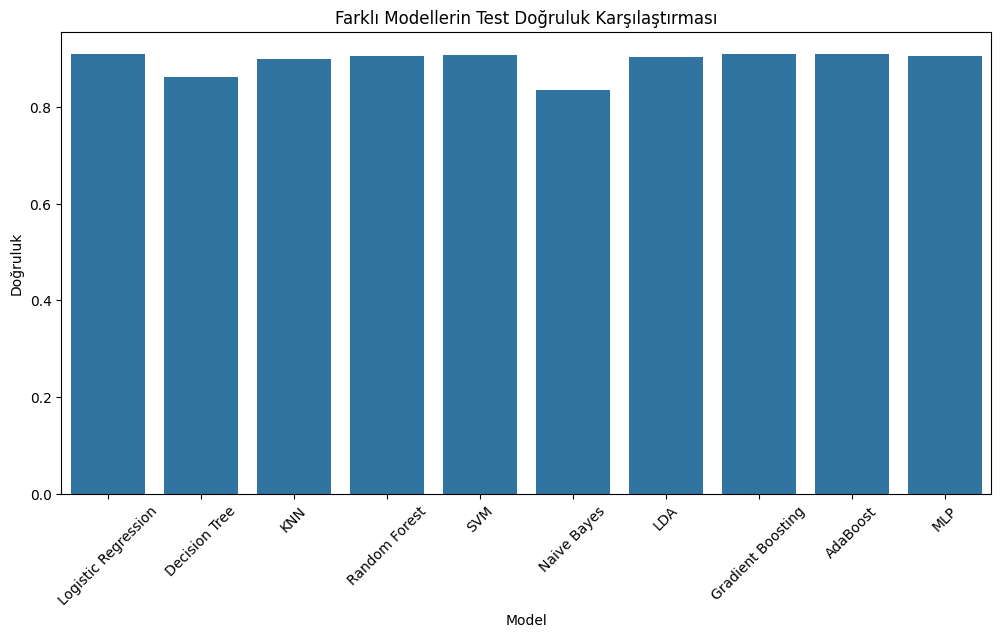

In [ ]:
# Modellerin doğruluk değerleri
model_scores = {
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'KNN',
        'Random Forest',
        'SVM',
        'Naive Bayes',
        'LDA',
        'Gradient Boosting',
        'AdaBoost',
        'MLP'
    ],
    'Accuracy': [
        log_accuracy,   # Logistic Regression accuracy
        tree_accuracy,    # Decision Tree accuracy
        knn_accuracy,   # KNN accuracy
        rf_accuracy,    # Random Forest accuracy
        svm_accuracy,   # SVM accuracy
        nb_accuracy,    # Naive Bayes accuracy
        lda_accuracy,   # LDA accuracy
        gb_accuracy,    # Gradient Boosting accuracy
        ada_accuracy,   # AdaBoost accuracy
        mlp_accuracy    # MLP accuracy
    ]
}

# En yüksek doğruluk değerini bulma
max_accuracy_index = model_scores['Accuracy'].index(max(model_scores['Accuracy']))
best_model = model_scores['Model'][max_accuracy_index]
print(f"En yüksek doğruluk oranına sahip model: {best_model} ({model_scores['Accuracy'][max_accuracy_index]})")

# DataFrame oluşturma
model_scores_df = pd.DataFrame(model_scores)

# Farklı modellerin test doğruluklarını bar grafiği ile görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=model_scores_df)
plt.title('Farklı Modellerin Test Doğruluk Karşılaştırması')
plt.xlabel('Model')
plt.ylabel('Doğruluk')
plt.xticks(rotation=45)  # X eksenindeki etiketleri döndür
plt.show()

# Karışıklık Matrisi (Confusion Matrix) Görselleştirmesi

Bu kod hücresinde, Logistic Regresyon (Logistic Regression) modelinin test seti üzerindeki tahmin sonuçları kullanılarak karışıklık matrisi hesaplanır ve görselleştirilir. Karışıklık matrisi, modelin doğru ve yanlış tahminlerini anlamak için önemli bir araçtır. Bu matris, gerçek pozitifler (TP), gerçek negatifler (TN), yanlış pozitifler (FP) ve yanlış negatifler (FN) hakkında bilgi verir. Grafikte, her hücrede sayılar görüntülenerek modelin performansı hakkında daha net bir bilgi sağlanır.


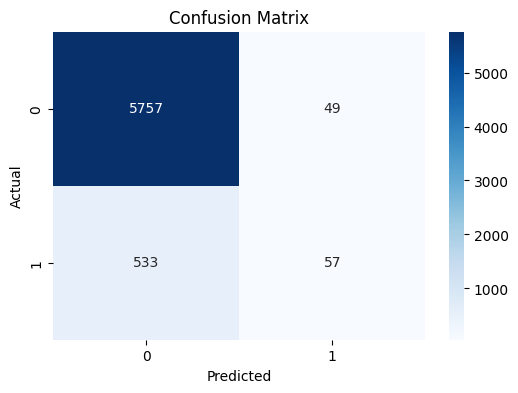

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix hesaplama
cm = confusion_matrix(y_test, y_pred_log)

# Confusion matrix'i görselleştirm
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Grafik başlığı ve etiketler
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Grafiği göster
plt.show()


# ROC Eğrisi ile Model Performansının Görselleştirilmesi

Bu kod hücresinde, Logistic Regresyon (Logistic Regression) modelinin test verisi üzerindeki tahmin olasılıkları kullanılarak ROC eğrisi oluşturulur. Yanlış pozitif oranı (FPR) ve doğru pozitif oranı (TPR) hesaplanarak ROC eğrisi çizilir. Ayrıca, ROC eğrisinin altında kalan alan (AUC) değeri de belirtilir. ROC eğrisi, modelin farklı sınıflandırma eşiklerinde nasıl performans gösterdiğini görselleştirmek için kullanılır. Ayrıca, rastgele tahmin çizgisi de grafikte gösterilerek modelin rastgele tahminden ne kadar iyi olduğunu anlamak kolaylaştırılır.


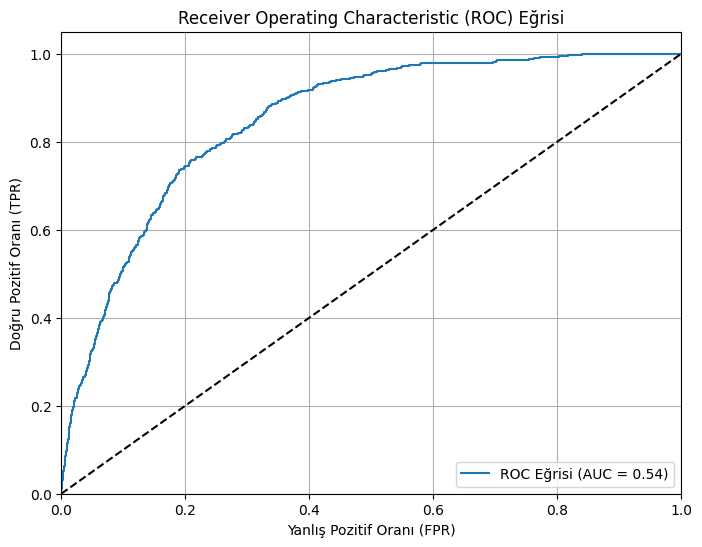

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_prob = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Eğrisi (AUC = {:.2f})'.format(log_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı (FPR)')
plt.ylabel('Doğru Pozitif Oranı (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Eğrisi')
plt.legend(loc='lower right')
plt.grid()
plt.show()